<a href="https://colab.research.google.com/github/pascale25/DeeP_learning_portfolio/blob/master/linear_reg_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

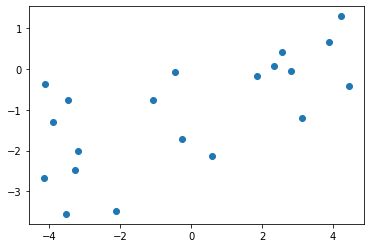

In [2]:
n=20
X = np.random.random(n)*10 -5 # random data on the x_axis in (-5, +5)
Y = 0.5 * X - 1 + np.random.randn(n) # a line plus some noice, slop = 0.5, yintercep=-1
plt.scatter(X,Y);

In [3]:
print(X), print(X.shape), print(Y), print(Y.shape)

[-0.45378337  2.34550268 -4.14201097 -2.12476378 -3.46519691  0.58832749
  2.80427482 -0.24721226  4.21325618 -1.07634486  3.13512843 -3.52958463
 -4.108853    4.43312899 -3.2781859   2.54879471  1.85573923 -3.88425518
 -3.18618141  3.87783088]
(20,)
[-0.08466651  0.06250924 -2.67898837 -3.47242967 -0.75984336 -2.13223426
 -0.04982432 -1.72209482  1.28584973 -0.76144286 -1.21376155 -3.54857804
 -0.37474974 -0.42016358 -2.48238586  0.42026688 -0.16412325 -1.30927851
 -2.02107066  0.66479084]
(20,)


(None, None, None, None)

In [4]:
# creat the linear regression model
model = nn.Linear(1,1)
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
# reshape the data ----- (num samples x num_dimensions)
X = X.reshape(n,1)
Y = Y.reshape(n, 1)
print(X[0:2])

[[-0.45378337]
 [ 2.34550268]]


In [6]:
# pytorch uses float 32 by default, nympy creat float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [7]:
type(inputs)

torch.Tensor

In [8]:
# train the model
epochs = 30
losses = []
for it in range (epochs):
  #zero the parameter gradients
  optimizer.zero_grad()
  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  # keep the loss, so we can plot it later
  losses.append(loss.item())
  # backward and optimizer
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{epochs}, Loss: {loss.item():4f}")



Epoch 1/30, Loss: 7.290051
Epoch 2/30, Loss: 5.409800
Epoch 3/30, Loss: 4.105390
Epoch 4/30, Loss: 3.195204
Epoch 5/30, Loss: 2.556467
Epoch 6/30, Loss: 2.105729
Epoch 7/30, Loss: 1.785953
Epoch 8/30, Loss: 1.557932
Epoch 9/30, Loss: 1.394558
Epoch 10/30, Loss: 1.276977
Epoch 11/30, Loss: 1.192004
Epoch 12/30, Loss: 1.130361
Epoch 13/30, Loss: 1.085489
Epoch 14/30, Loss: 1.052722
Epoch 15/30, Loss: 1.028727
Epoch 16/30, Loss: 1.011112
Epoch 17/30, Loss: 0.998152
Epoch 18/30, Loss: 0.988597
Epoch 19/30, Loss: 0.981541
Epoch 20/30, Loss: 0.976322
Epoch 21/30, Loss: 0.972457
Epoch 22/30, Loss: 0.969591
Epoch 23/30, Loss: 0.967464
Epoch 24/30, Loss: 0.965884
Epoch 25/30, Loss: 0.964709
Epoch 26/30, Loss: 0.963835
Epoch 27/30, Loss: 0.963184
Epoch 28/30, Loss: 0.962699
Epoch 29/30, Loss: 0.962338
Epoch 30/30, Loss: 0.962069


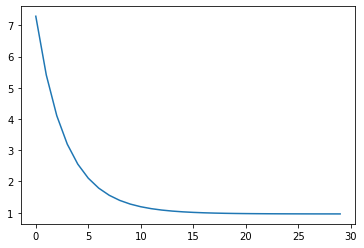

In [9]:
plt.plot(losses);

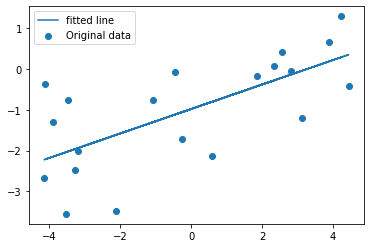

In [10]:
from torch.nn.modules import PairwiseDistance
# plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label ='Original data')
plt.plot(X, predicted, label = "fitted line")
plt.legend()
plt.show()

In [11]:
model(inputs)

tensor([[-1.1183],
        [-0.2799],
        [-2.2229],
        [-1.6187],
        [-2.0202],
        [-0.8061],
        [-0.1424],
        [-1.0564],
        [ 0.2796],
        [-1.3047],
        [-0.0433],
        [-2.0395],
        [-2.2130],
        [ 0.3454],
        [-1.9642],
        [-0.2190],
        [-0.4265],
        [-2.1457],
        [-1.9367],
        [ 0.1791]], grad_fn=<AddmmBackward0>)

In [12]:
model(inputs).detach().numpy()

array([[-1.1182674 ],
       [-0.27985013],
       [-2.2229328 ],
       [-1.6187446 ],
       [-2.0202193 ],
       [-0.80614364],
       [-0.14244276],
       [-1.0563971 ],
       [ 0.27956295],
       [-1.3047316 ],
       [-0.04334837],
       [-2.039504  ],
       [-2.2130015 ],
       [ 0.34541714],
       [-1.9642074 ],
       [-0.2189619 ],
       [-0.42653972],
       [-2.145732  ],
       [-1.936651  ],
       [ 0.17909932]], dtype=float32)

In [13]:
# another way to make prediction
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-1.1182674 ],
       [-0.27985013],
       [-2.2229328 ],
       [-1.6187446 ],
       [-2.0202193 ],
       [-0.80614364],
       [-0.14244276],
       [-1.0563971 ],
       [ 0.27956295],
       [-1.3047316 ],
       [-0.04334837],
       [-2.039504  ],
       [-2.2130015 ],
       [ 0.34541714],
       [-1.9642074 ],
       [-0.2189619 ],
       [-0.42653972],
       [-2.145732  ],
       [-1.936651  ],
       [ 0.17909932]], dtype=float32)

In [14]:
# inspect model parameters , are there close to true value
# true values are  w = 0.5, b = -1
w = model.weight.data.numpy()
b=model.bias.data.numpy()
print(w,b)

[[0.29951113]] [-0.9823543]


# Regression 

In [15]:
# get the data 
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-10-11 14:28:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-10-11 14:28:38 (20.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [16]:
# load in the data
data = pd.read_csv("moore.csv", header = None).values
XX = data[:,0].reshape(-1, 1) # make it a 2D arrar o size N*D where D=1
YY = data[:, 1].reshape(-1, 1) 

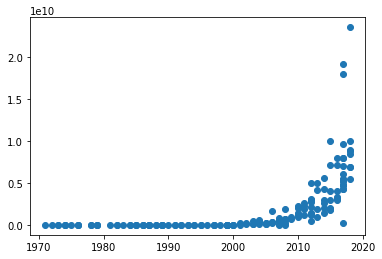

In [17]:
plt.scatter(XX, YY);

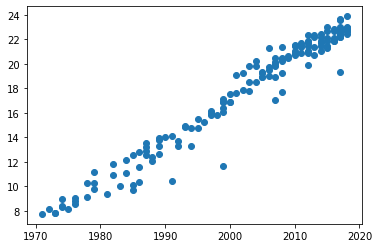

In [18]:
YY = np.log(YY)
plt.scatter(XX, YY);

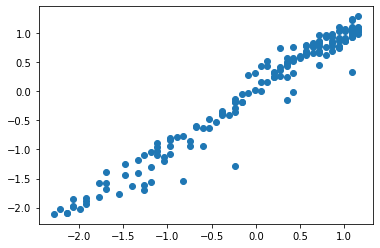

In [19]:
# scale and ceter both the x and y
mx = XX.mean()
sx = XX.std()
my = YY.mean()
sy = YY.std()
XX = (XX - mx)/sx
YY = (YY - my)/sy
# evrything is centered in a small range
plt.scatter(XX,YY)

In [20]:
# convert to float32
x = XX.astype(np.float32)
y = YY.astype(np.float32)
# creat de linear regression model
model = nn.Linear(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum= 0.7)
# inputs and targets
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
type(inputs)

torch.Tensor

In [21]:
# train the model
epochs = 100
losses = []
for it in range (epochs):
  #zero the parameter gradients
  optimizer.zero_grad()
  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  # keep the loss, so we can plot it later
  losses.append(loss.item())
  # backward and optimizer
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{epochs}, Loss: {loss.item():4f}")

Epoch 1/100, Loss: 1.499337
Epoch 2/100, Loss: 1.441487
Epoch 3/100, Loss: 1.346930
Epoch 4/100, Loss: 1.232189
Epoch 5/100, Loss: 1.109301
Epoch 6/100, Loss: 0.986520
Epoch 7/100, Loss: 0.869144
Epoch 8/100, Loss: 0.760290
Epoch 9/100, Loss: 0.661525
Epoch 10/100, Loss: 0.573371
Epoch 11/100, Loss: 0.495667
Epoch 12/100, Loss: 0.427842
Epoch 13/100, Loss: 0.369096
Epoch 14/100, Loss: 0.318526
Epoch 15/100, Loss: 0.275213
Epoch 16/100, Loss: 0.238263
Epoch 17/100, Loss: 0.206847
Epoch 18/100, Loss: 0.180207
Epoch 19/100, Loss: 0.157668
Epoch 20/100, Loss: 0.138634
Epoch 21/100, Loss: 0.122583
Epoch 22/100, Loss: 0.109065
Epoch 23/100, Loss: 0.097693
Epoch 24/100, Loss: 0.088134
Epoch 25/100, Loss: 0.080104
Epoch 26/100, Loss: 0.073364
Epoch 27/100, Loss: 0.067709
Epoch 28/100, Loss: 0.062965
Epoch 29/100, Loss: 0.058989
Epoch 30/100, Loss: 0.055656
Epoch 31/100, Loss: 0.052863
Epoch 32/100, Loss: 0.050523
Epoch 33/100, Loss: 0.048563
Epoch 34/100, Loss: 0.046921
Epoch 35/100, Loss: 0.0

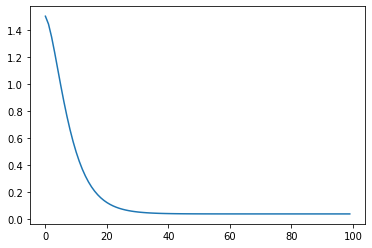

In [22]:
plt.plot(losses);

In [23]:
type(XX)  , type(YY)

(numpy.ndarray, numpy.ndarray)

In [24]:
predicted = model(inputs).detach().numpy()
type(predicted)

numpy.ndarray

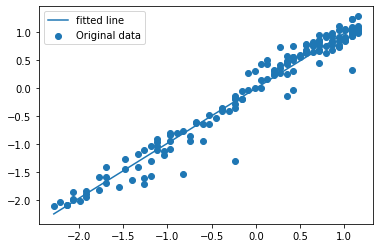

In [25]:
# plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(XX, YY, label ='Original data')
plt.plot(XX, predicted, label = "fitted line")
plt.legend()
plt.show()

In [26]:
# Weigh of the model
w = model.weight.data.numpy()
print(w)


[[0.9803593]]


In [44]:
model.state_dict()

OrderedDict([('weight', tensor([[0.9804]])), ('bias', tensor([-0.0001]))])

# Classification: breast cancer classification 

In [27]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get the data
data = load_breast_cancer()
X, Y = data.data, data.target
print(type(data))
print(data.keys())
print(data.data.shape)
print(data.target[0:5])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
[0 0 0 0 0]


In [28]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
data.target.shape

(569,)

In [30]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.033)

In [32]:
N, D = X_train.shape
print(X_train.shape)
print(N) # columns
print(D) # features

(550, 30)
550
30


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#model_3 = nn.Sequential(nn.Linear(D,1), nn.Sigmoid()) # shape of data is N X D
model_3 = nn.Sequential(nn.Linear(D,1), nn.Sigmoid()) # shape of data is N X D
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [35]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1)) # reshape to 2D array
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [36]:
X_train [0][0:3]

tensor([1.5000, 1.6738, 1.5222])

In [37]:
y_train[0:9]

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.]])

In [38]:
epochs = 1000
#losses = []
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)

for it in range(epochs):
  # Zero grad 
  optimizer.zero_grad()
  #  # forward pass
  outputs = model_3(X_train)
  loss = criterion(outputs, y_train)
  # keep the loss, so we can plot it later
  #losses.append(loss.item())
  # backward and optimizer
  loss.backward()
  optimizer.step()


  # get test lost
  outputs_test = model_3(X_test)
  loss_test = criterion(outputs_test, y_test)
  # Save losses
  train_loss[it] = loss.item()
  test_loss[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f"Epoch {it+1}/{epochs}, train Loss: {loss.item():.4f} , test loss : {loss_test.item():.4f}")

Epoch 50/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 100/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 150/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 200/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 250/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 300/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 350/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 400/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 450/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 500/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 550/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 600/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 650/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 700/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 750/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 800/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 850/1000, train Loss: 0.6015 , test loss : 0.6094
Epoch 900/1000, train Loss: 0.6015 , test loss : 

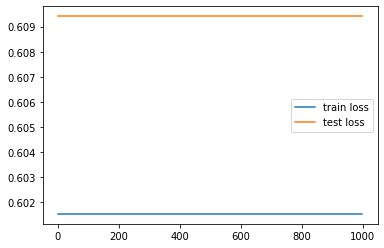

In [39]:
# plot the train loss and test loss per iteration
plt.plot(train_loss, label = "train loss")
plt.plot(test_loss, label ='test loss')
plt.legend()
plt.show()

In [40]:
# evaluating the model
with torch.no_grad():
  p_train = model_3(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model_3(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"train acc: {train_acc: .4f}, test acc: {test_acc:.4f}")


train acc:  0.7145, test acc: 0.8421


In [53]:
# plot the accuracy too
#plt.plot(r.history['accuracy'], label = 'acc')
#plt.plot(r.history['val_accuracy'], label = 'val_acc')
#plt.legend()
#plt.show()

In [45]:
# model state dict
model_3.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0417, -0.1096,  0.0575,  0.1527, -0.1755, -0.0583,  0.0883, -0.0019,
                        0.1556, -0.1719, -0.0571, -0.1499, -0.0944,  0.1808,  0.1015,  0.0841,
                        0.0826, -0.1800,  0.0163, -0.1081,  0.0343, -0.0145,  0.0314, -0.1271,
                       -0.0374, -0.0431, -0.0663, -0.1721, -0.1270,  0.0584]])),
             ('0.bias', tensor([0.1060]))])

In [46]:
# save the model
torch.save(model_3.state_dict(), 'mymodel.pt') # in google drive directory

In [50]:
! ls

moore.csv  mymodel.pt  sample_data


In [48]:
#load model_3
model_load = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())
model_load.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [49]:
# evaluate de new model
with torch.no_grad():
  p_train = model_load(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model_3(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"train acc: {train_acc: .4f}, test acc: {test_acc:.4f}")

train acc:  0.7145, test acc: 0.8421


In [52]:
# Download the model
from google.colab import files
#files.download('mymodel.pt') # here to download localy and share

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Linear Classification (with logits)BCE Loss With Logits 

In [57]:
#model_3 = nn.Sequential(nn.Linear(D,1), nn.Sigmoid()) # shape of data is N X D
model_4 = nn.Linear(D,1) # ,nn.Sigmoid()) # shape of data is N X D
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [58]:
epochs = 1000
#losses = []
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)

for it in range(epochs):
  # Zero grad 
  optimizer.zero_grad()
  #  # forward pass
  outputs = model_4(X_train)
  loss = criterion(outputs, y_train)
  # keep the loss, so we can plot it later
  #losses.append(loss.item())
  # backward and optimizer
  loss.backward()
  optimizer.step()


  # get test lost
  outputs_test = model_4(X_test)
  loss_test = criterion(outputs_test, y_test)
  # Save losses
  train_loss[it] = loss.item()
  test_loss[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f"Epoch {it+1}/{epochs}, train Loss: {loss.item():.4f} , test loss : {loss_test.item():.4f}")

Epoch 50/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 100/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 150/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 200/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 250/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 300/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 350/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 400/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 450/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 500/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 550/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 600/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 650/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 700/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 750/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 800/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 850/1000, train Loss: 0.7473 , test loss : 0.7244
Epoch 900/1000, train Loss: 0.7473 , test loss : 

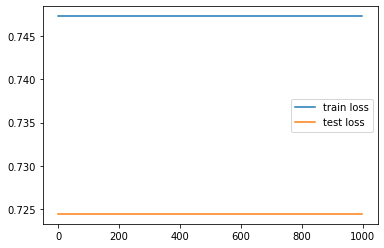

In [59]:
# plot the train loss and test loss per iteration
plt.plot(train_loss, label = "train loss")
plt.plot(test_loss, label ='test loss')
plt.legend()
plt.show()

In [61]:
# evaluating the model
with torch.no_grad():
  p_train = model_4(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model_4(X_test)
  p_test = (p_test.numpy()> 0)
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"train acc: {train_acc: .4f}, test acc: {test_acc:.4f}")

train acc:  0.4000, test acc: 0.4737
